<center><h2> Observing Growth in Total Foreign Reserves, Growth in Net Balances of CPF Members, and its relation. (1972 - 2015)</h2></center>

<h3>**Name: Kenneth Lee**</h3>
****

<p>
    My analysis aims to visualise both Singapore's Total Foreign Reserves and CPF balance from 1972 - 2015, and to determine if Foreign Reserves growth can be explained by growth in CPF balance.
</p> 
<hr>
<center><h1>Dataset</h1></center>
<hr>
<p>
    <a href="https://data.gov.sg/dataset/net-balances-of-cpf-members-as-at-end-of-month">Net Balances of CPF Members as at End of Month</a> -- retrieved from data.gov.sg.
    </p>
    <a href="https://data.gov.sg/dataset/total-foreign-reserves">Total Foreign Reserves</a> -- retrieved from data.gov.sg.
</p>
<br><a href="https://data.gov.sg/dataset/singapore-s-portfolio-investment-assets-by-country-region-and-instrument-end-of-period-annual">Singapore’s Portfolio Investment Assets By Country/Region And Instrument, (End Of Period), Annual</a> -- retrieved from data.gov.sg.
</p>

<h3>Description</h3>
<p> 
    The datasets describe Singapore's Total Foreign Reserves and Net CPF balance .<br>
   <p>
    <i>
        All figures in S\$ millions, except for the Total Foreign Reserve (USD) column, which is in US$ millions.
Prior to May 1999, Singapore's official foreign reserves were valued at book cost. With effect from May 1999, the book value of foreign reserve assets are translated at market exchange rates prevailing at the end of each reporting month.
    </i>
   <p>
       <i>Net balances of CPF members as at end of month.<i/>
</p>
       <p>
       <i>Breakdown of portfolio investment assets by broad instruments, at a point in time.<i/>
</p>

<hr>
<center><h1>Methodology</h1></center>
<hr>

<h4>Importing relevant packages:</h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
sns.set()

D:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<h4>Reading necessary csv files:</h4>
<p>
    -Setting dataframe to desired format and range<br>

In [90]:
#importing csv file
cpf_df_raw = pd.read_csv('net-balances-of-cpf-members-as-at-end-of-month.csv', index_col = 0)
f_rserv_df_raw = pd.read_csv('total-foreign-reserves-monthly.csv', index_col=0)

#setting dataframe to desired format & range
f_rserv_df = f_rserv_df_raw.drop(columns=['special_drawing_rights','imf_reserve_position',
                                       'gold_and_foreign_exchange'])

cpf_df = cpf_df_raw.loc['1972-01':'2015-12']

# Adding new column to cpf_df which measures balance amount in millions:
cpf_df1 = cpf_df.reset_index()
cpf_df1['cpf_bal_amt'] = cpf_df1['net_bal_amt'] / 1_000_000

# Adding index to f_rserv_df:
f_rserv_df1 = f_rserv_df.reset_index()


<h2> Growth visualisation </h2>

<p>
    Visualising growth of total foreign reserve & total CPF balance (1972-2015).
</p>

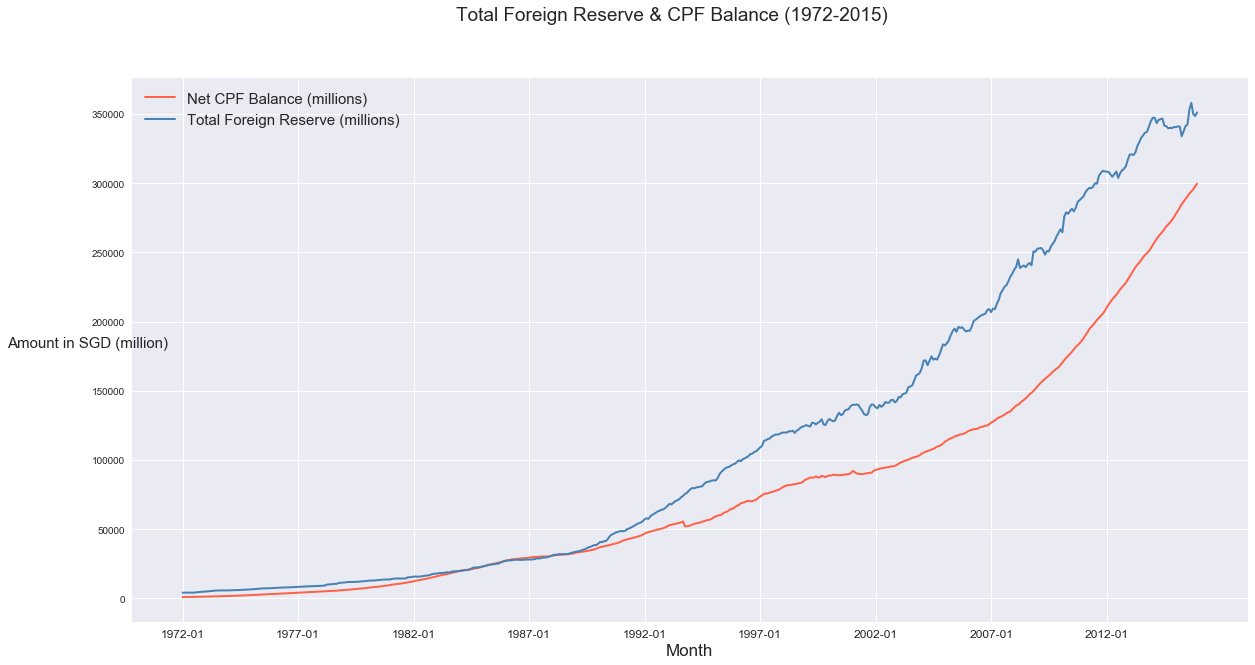

In [93]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

cpf_df1.plot(kind='line', x='mth', y='cpf_bal_amt', ax=ax, color='tomato',linewidth=2)
f_rserv_df1.plot(kind='line', x='month', y='total_foreign_reserve_sgd', ax=ax, color='steelblue',linewidth=2)

fig.suptitle('Total Foreign Reserve & CPF Balance (1972-2015)', fontsize=19)
plt.xlabel("Month", fontsize=17)
plt.ylabel('Amount in SGD (million)',rotation=0, fontsize=15)
ax.legend(["Net CPF Balance (millions)",'Total Foreign Reserve (millions)'], fontsize=15)
ax.set_xticklabels(f_rserv_df1.month[:528:60], rotation = 0,fontsize=12)
ax.set_xticks(np.arange(0,528,60))

plt.show()

<h2> Regressing Total Foreign Reserve on Net CPF balance:</h2>

<p>
    <b>Dependent Variable:</b> Total Foreign Reserve. <b>Independent Variable:</b> Net CPF balance.
</p>


In [87]:
y = f_rserv_df1['total_foreign_reserve_sgd']
X = cpf_df1['cpf_bal_amt']

X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     total_foreign_reserve_sgd   R-squared:                       0.973
Model:                                   OLS   Adj. R-squared:                  0.973
Method:                        Least Squares   F-statistic:                 1.906e+04
Date:                       Fri, 05 Oct 2018   Prob (F-statistic):               0.00
Time:                               20:34:57   Log-Likelihood:                -5911.2
No. Observations:                        528   AIC:                         1.183e+04
Df Residuals:                            526   BIC:                         1.183e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3037.7470   1100.329      2.761      0.006     876.167    5199.327
cpf_bal_amt     1.3984      0.010    138.058      0.000       1.379       1.418
==============================================================================
Omnibus:                       63.446   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.808
Skew:                          -0.549   Prob(JB):                     1.84e-43
Kurtosis:                       5.782   Cond. No.                     1.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h2>Regression plot</h2>

The following code visualises the regression plot of total foreign reserve on total CPF balance.

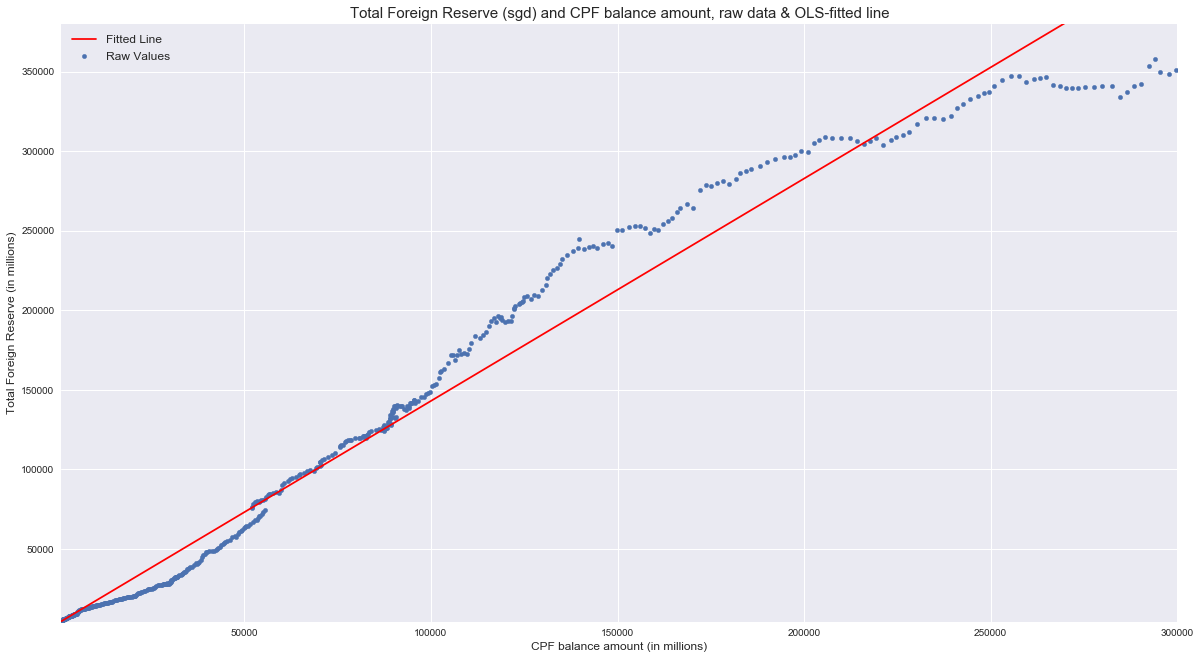

In [89]:
# adding OLS-fitted line into dataframe for plot
cpf_df1['total_foreign_reserve_sgd'] = f_rserv_df1['total_foreign_reserve_sgd']
cpf_df1['fitted_value'] = sm.OLS(y,X).fit().fittedvalues

fig1 = plt.figure(figsize=(20, 11))
ax1 = fig1.add_subplot(111)
cpf_df1.plot(kind='scatter', x='cpf_bal_amt', y='total_foreign_reserve_sgd', 
         ax=ax1)
cpf_df1.plot(kind='line', x='cpf_bal_amt', y='fitted_value', ax=ax1, color='red')
ax1.legend(['Fitted Line', 'Raw Values'],fontsize=12)
plt.title("Total Foreign Reserve (sgd) and CPF balance amount, raw data & OLS-fitted line", fontsize = 15)

plt.xlim(1000, 300000)
plt.ylim(4100, 380000)

plt.ylabel('Total Foreign Reserve (in millions)', fontsize=12)
plt.xlabel('CPF balance amount (in millions)', fontsize=12)

plt.show()

<h2>Conclusion</h2>

As seen from the results, there is a <b>strong</b> linear relationship between total foreign reserve and total CPF balance. R-squared value of 0.973 suggest that 97.3% of the variation in <u>total foreign reserve</u> can be explained by <u>total CPF balance</u>.

    

<h3>Extra</h3>

CPF Board invest its money in Special Singapore Government Securities (SSGS), which are Government bonds fully guaranteed by the Government. The Government then takes the investment risk in managing SSGS proceeds through its investment corp (GIC). 

<i>"So while the CPF monies are not directly transferred to GIC for management, one of the sources of funds for the Government’s assets managed by GIC is the proceeds from SSGS."</i> - GIC

<h4>Visualising Singapore's investment portfolio (2001-2017):</h4>
<p>
    -importing dataset
   <br> -rearranging format
    <br>-plotting portfolio size<br>

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


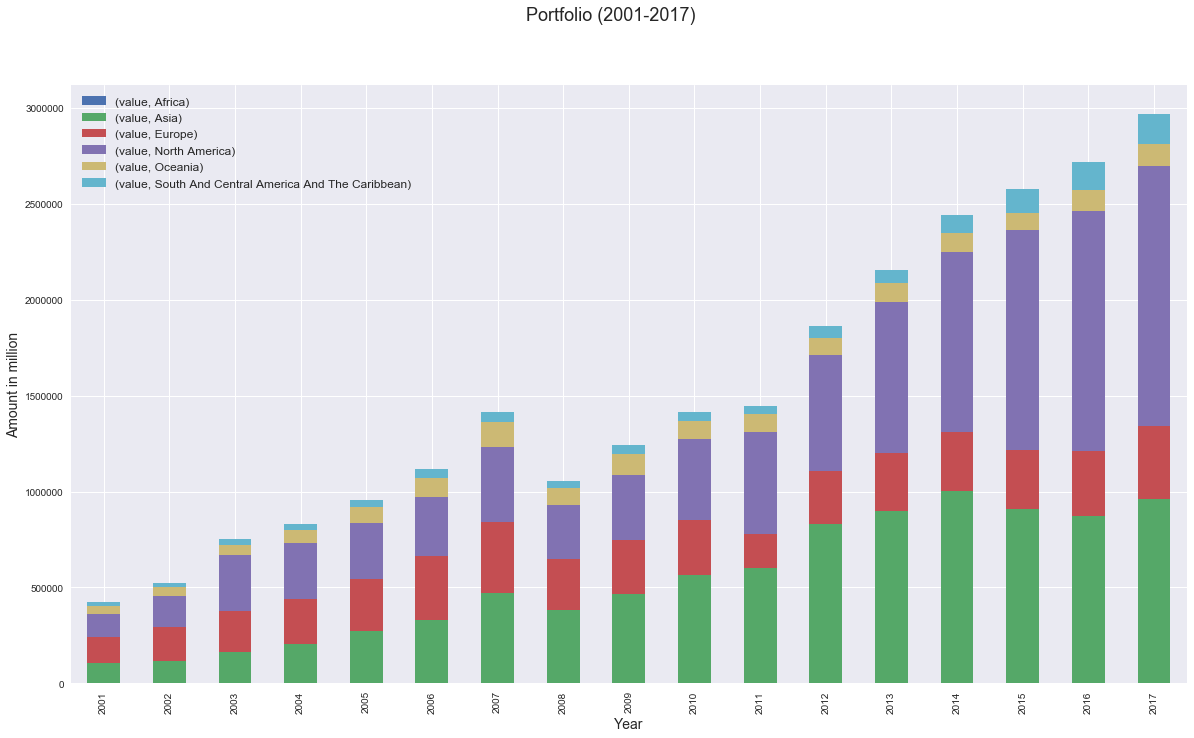

In [29]:
portfolio_df = pd.read_csv('singapores-portfolio-investment-assets-by-county-and-instrument-annual.csv')
portfolio_df['value'] = portfolio_df['value'].convert_objects(convert_numeric=True)
portfolio_df = portfolio_df.fillna(0)
portfolio_pivot_df = pd.pivot_table(portfolio_df, index=['year'],columns=['level_2'],values=["value"],aggfunc=np.sum)

fig = plt.figure(figsize=(20,11))
ax = fig.add_subplot(111)

portfolio_pivot_df.plot(kind='bar',stacked=True, ax=ax)

fig.suptitle('Portfolio (2001-2017)', fontsize=18)
ax.legend(fontsize=12)
plt.ylabel('Amount in million', fontsize=14)
plt.xlabel('Year',fontsize=14)

plt.show()